In [64]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn import preprocessing
from keras import models

%matplotlib inline
rcParams['figure.figsize'] = 14, 8

In [65]:
transactions = pd.read_csv('/root/veridion/veridion/AML_hack/HI-Small_Trans.csv')

In [66]:
print(len(transactions.columns))
transactions.columns

11


Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

In [67]:
labels = transactions['Is Laundering']
del transactions['Is Laundering']

# Autoencoder

In [71]:
input_layer = Input(shape=(10, ))
encoder = Dense(10, activation="tanh")(input_layer)
encoder = Dense(8, activation="tanh")(encoder)
encoder = Dense(6, activation="tanh")(encoder)
encoder = Dense(5, activation="relu")(encoder)

decoder = Dense(6, activation='tanh')(encoder)
decoder = Dense(8, activation='tanh')(decoder)
decoder = Dense(10, activation='relu')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [72]:
from keras import optimizers
adam = optimizers.Adam(learning_rate=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.1)

autoencoder.compile(optimizer=adam, loss='mean_squared_error')

/root/.conda/envs/veridion/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [73]:
def df_label_encoder(df, columns):
        le = preprocessing.LabelEncoder()
        for i in columns:
            df[i] = le.fit_transform(df[i].astype(str))
        return df

df = df_label_encoder(transactions,['Payment Format', 'Payment Currency', 'Receiving Currency', 'Account', 'Account.1'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True, format='mixed')
df['Timestamp'] = df['Timestamp'].apply(lambda x: x.value)
df['Timestamp'] = (df['Timestamp']-df['Timestamp'].min())/(df['Timestamp'].max()-df['Timestamp'].min())

In [74]:
X_train = transactions.values

In [75]:
# run on gpu0
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [ ]:
nb_epoch = 300
batch_size = 64

import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


checkpointer = ModelCheckpoint(filepath="model.keras",
                               verbose=0,
                               save_best_only=True)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(np.asarray(X_train).astype('float32'), np.asarray(X_train).astype('float32'),
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/300
63480/63480 ━━━━━━━━━━━━━━━━━━━━ 213s 3ms/step - loss: 119590091592040448.0000 - val_loss: 131092202989289472.0000
Epoch 2/300
63480/63480 ━━━━━━━━━━━━━━━━━━━━ 198s 3ms/step - loss: 169013147850506240.0000 - val_loss: 131092194399354880.0000
Epoch 3/300
63480/63480 ━━━━━━━━━━━━━━━━━━━━ 220s 3ms/step - loss: 114359843627728896.0000 - val_loss: 131092177219485696.0000
Epoch 4/300
63480/63480 ━━━━━━━━━━━━━━━━━━━━ 194s 3ms/step - loss: 153665992751316992.0000 - val_loss: 131092177219485696.0000
Epoch 5/300
63480/63480 ━━━━━━━━━━━━━━━━━━━━ 200s 3ms/step - loss: 149478004500725760.0000 - val_loss: 131092134269812736.0000
Epoch 6/300
63480/63480 ━━━━━━━━━━━━━━━━━━━━ 212s 3ms/step - loss: 95327512099291136.0000 - val_loss: 131092091320139776.0000
Epoch 7/300
63480/63480 ━━━━━━━━━━━━━━━━━━━━ 201s 3ms/step - loss: 132553453942603776.0000 - val_loss: 131092074140270592.0000
Epoch 8/300
53764/63480 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 212451656808267776.0000

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



63480/63480 ━━━━━━━━━━━━━━━━━━━━ 228s 4ms/step - loss: 125567689635659776.0000 - val_loss: 131091490024718336.0000
Epoch 23/300
22333/63480 ━━━━━━━━━━━━━━━━━━━━ 1:46 3ms/step - loss: 593433913301401600.0000

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



53030/63480 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 478394485588361216.0000

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



50395/63480 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 357580319727026176.0000

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



63480/63480 ━━━━━━━━━━━━━━━━━━━━ 210s 3ms/step - loss: 251425083405369344.0000 - val_loss: 131090055505641472.0000
Epoch 43/300
22279/63480 ━━━━━━━━━━━━━━━━━━━━ 1:59 3ms/step - loss: 76882044902178816.0000

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



27858/63480 ━━━━━━━━━━━━━━━━━━━━ 2:00 3ms/step - loss: 218687244947423232.0000

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



63480/63480 ━━━━━━━━━━━━━━━━━━━━ 193s 3ms/step - loss: 203356307644743680.0000 - val_loss: 131088844324864000.0000
Epoch 61/300
 3834/63480 ━━━━━━━━━━━━━━━━━━━━ 3:16 3ms/step - loss: 11560097750712320.0000

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



53451/63480 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 39338571831705600.0000

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



32791/63480 ━━━━━━━━━━━━━━━━━━━━ 1:27 3ms/step - loss: 96762099895631872.0000

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



63480/63480 ━━━━━━━━━━━━━━━━━━━━ 215s 3ms/step - loss: 167866391582474240.0000 - val_loss: 131087744813236224.0000
Epoch 85/300
60863/63480 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 97854241359527936.0000

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



63480/63480 ━━━━━━━━━━━━━━━━━━━━ 217s 3ms/step - loss: 133086614002860032.0000 - val_loss: 131087641734021120.0000
Epoch 87/300
63480/63480 ━━━━━━━━━━━━━━━━━━━━ 205s 3ms/step - loss: 134112217833406464.0000 - val_loss: 131087624554151936.0000
Epoch 88/300
63480/63480 ━━━━━━━━━━━━━━━━━━━━ 213s 3ms/step - loss: 238878143903956992.0000 - val_loss: 131087590194413568.0000
Epoch 89/300
63480/63480 ━━━━━━━━━━━━━━━━━━━━ 205s 3ms/step - loss: 323524321446199296.0000 - val_loss: 131087564424609792.0000
Epoch 90/300
63480/63480 ━━━━━━━━━━━━━━━━━━━━ 187s 3ms/step - loss: 203706811335835648.0000 - val_loss: 131087530064871424.0000
Epoch 91/300
63480/63480 ━━━━━━━━━━━━━━━━━━━━ 206s 3ms/step - loss: 229433562359660544.0000 - val_loss: 131087487115198464.0000
Epoch 92/300
63480/63480 ━━━━━━━━━━━━━━━━━━━━ 194s 3ms/step - loss: 270411106596421632.0000 - val_loss: 131087461345394688.0000
Epoch 93/300
63480/63480 ━━━━━━━━━━━━━━━━━━━━ 193s 3ms/step - loss: 97855392410763264.0000 - val_loss: 13108741839572

# Prediction

In [76]:
autoencoder = models.load_model('model.keras')

In [77]:
predictions = autoencoder.predict(np.asarray(X_train).astype('float32'))
mse = np.mean(np.power(np.asarray(X_train).astype('float32') - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': labels})
error_df.describe()

158699/158699 ━━━━━━━━━━━━━━━━━━━━ 164s 1ms/step


/root/.conda/envs/veridion/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,reconstruction_error,true_class
count,5.078345e+06,5.078345e+06
mean,1.832258e+17,1.019427e-03
std,inf,3.191219e-02
min,5.030687e+09,0.000000e+00
25%,2.796598e+12,0.000000e+00
50%,2.808128e+12,0.000000e+00
75%,2.812582e+12,0.000000e+00
max,2.189482e+23,1.000000e+00


In [78]:
thresholds = [0.05, 0.078, 0.125, 0.178, 0.195, 0.225]

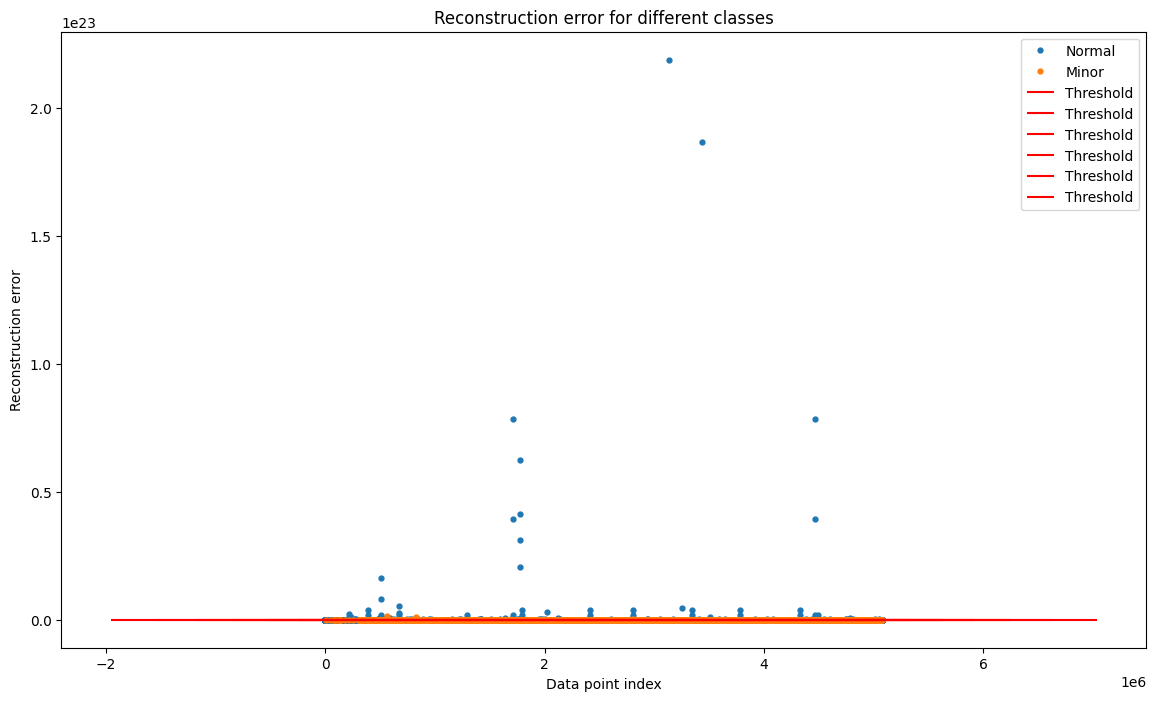

In [79]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Minor" if name == 1 else "Normal")
for threshold in thresholds:
    ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

# Evaluation

In [82]:
model = models.load_model('model.keras')

## Small_AML_ChallangeHB2.csv

In [83]:
testing_small = pd.read_csv('/root/veridion/veridion/git/wetransfer_aml-challenge-hbn2-bt_2024-04-21_0933/Small_AML_ChallangeHB2.csv')

labels = testing_small['Is Laundering']
del testing_small['Is Laundering']

def df_label_encoder(df, columns):
        le = preprocessing.LabelEncoder()
        for i in columns:
            df[i] = le.fit_transform(df[i].astype(str))
        return df

df = df_label_encoder(testing_small,['Payment Format', 'Payment Currency', 'Receiving Currency', 'Account', 'Account.1'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True, format='mixed')
df['Timestamp'] = df['Timestamp'].apply(lambda x: x.value)
df['Timestamp'] = (df['Timestamp']-df['Timestamp'].min())/(df['Timestamp'].max()-df['Timestamp'].min())

In [84]:
predictions = model.predict(np.asarray(testing_small.values).astype('float32'))

3129/3129 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


#### Metrics

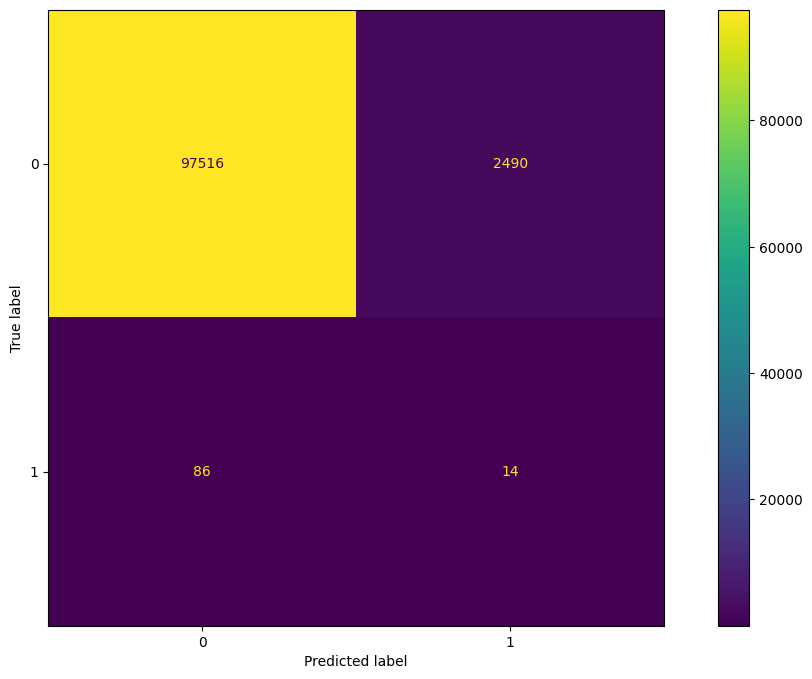

acc = 0.974 prec = 0.006 recal = (0.14, 3) f1 = 0.011


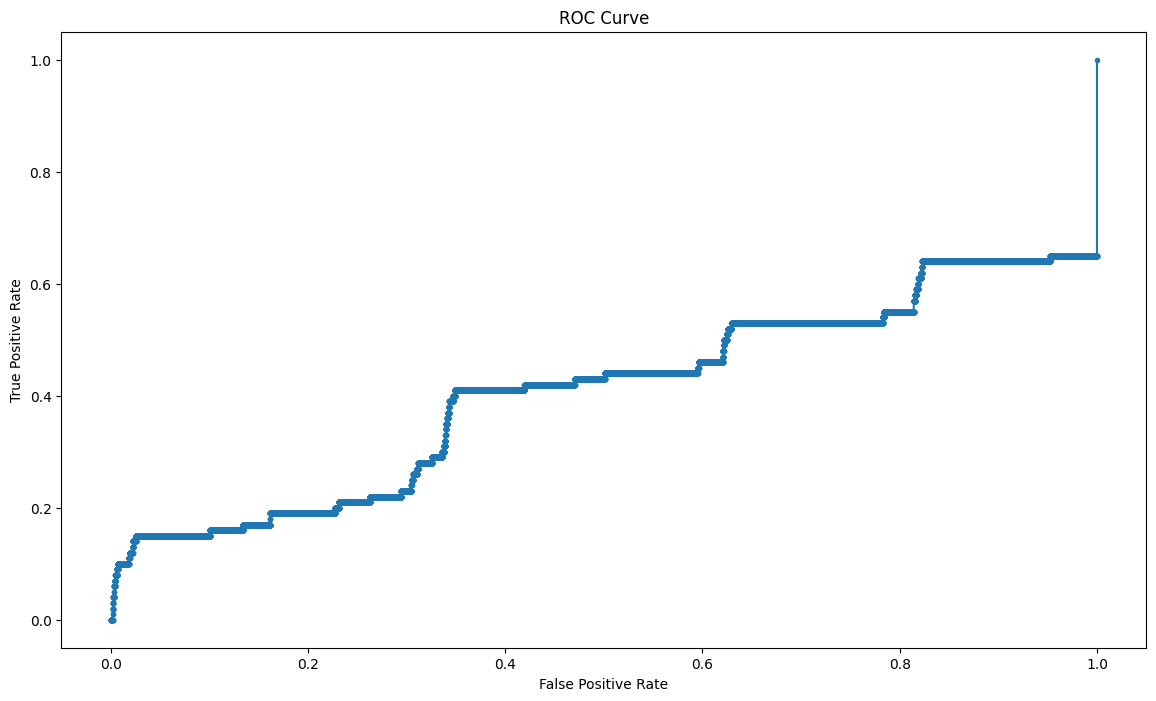

Auc for our sample data is 0.405


In [87]:
re = np.linalg.norm(np.asarray(testing_small.values).astype('float32') - predictions, axis = 1)

threshold = 5300000

result_list = [1 if value > threshold else 0 for value in re]


# Confusion Maxtrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

conf_matrix = confusion_matrix(labels, result_list)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()


# Accuracy + Precision + Recall + F1
acc = np.round(metrics.accuracy_score(labels, result_list), 3)
prec = np.round(metrics.precision_score(labels, result_list), 3)
rec = (metrics.recall_score(labels, result_list), 3)
f1 = np.round(metrics.f1_score(labels, result_list), 3)

print("acc = " + str(acc) + " prec = "  + str(prec) + " recal = " +  str(rec) + " f1 = "  + str(f1))

# ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(labels, re)

plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC
from sklearn .metrics import roc_auc_score

auc = np.round(roc_auc_score(labels, re), 3)
print("Auc for our sample data is {}".format(auc))

## AML_ChallangeHB2.csv

In [88]:
testing_big = pd.read_csv('/root/veridion/veridion/git/wetransfer_aml-challenge-hbn2-bt_2024-04-21_0933/AML_ChallangeHB2.csv')

labels = testing_big['Is Laundering']
del testing_big['Is Laundering']


def df_label_encoder(df, columns):
        le = preprocessing.LabelEncoder()
        for i in columns:
            df[i] = le.fit_transform(df[i].astype(str))
        return df

df = df_label_encoder(testing,['Payment Format', 'Payment Currency', 'Receiving Currency', 'Account', 'Account.1'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True, format='mixed')
df['Timestamp'] = df['Timestamp'].apply(lambda x: x.value)
df['Timestamp'] = (df['Timestamp']-df['Timestamp'].min())/(df['Timestamp'].max()-df['Timestamp'].min())

In [89]:
predictions = model.predict(np.asarray(testing.values).astype('float32'))

379798/379798 ━━━━━━━━━━━━━━━━━━━━ 444s 1ms/step


### Metrics

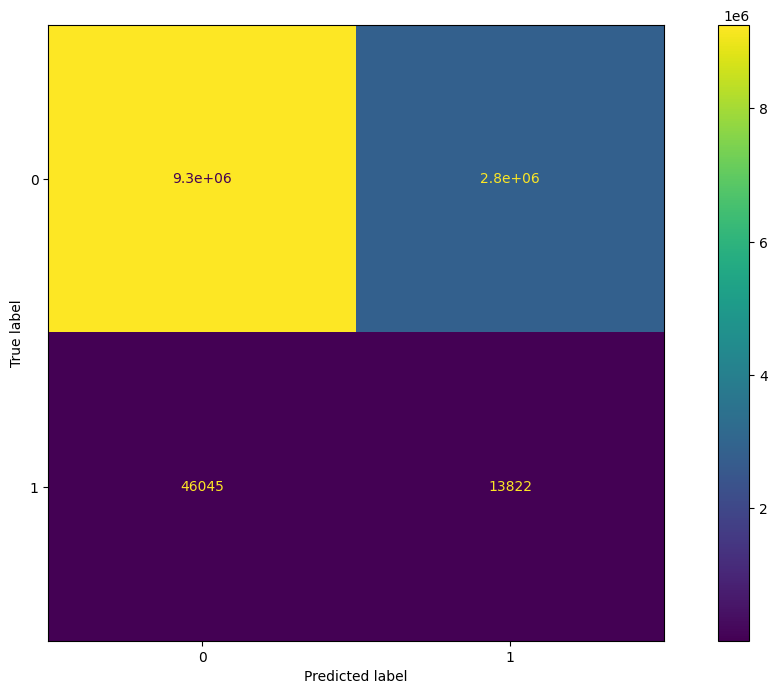

acc = 0.763 prec = 0.005 recal = (0.23087844722468137, 3) f1 = 0.009


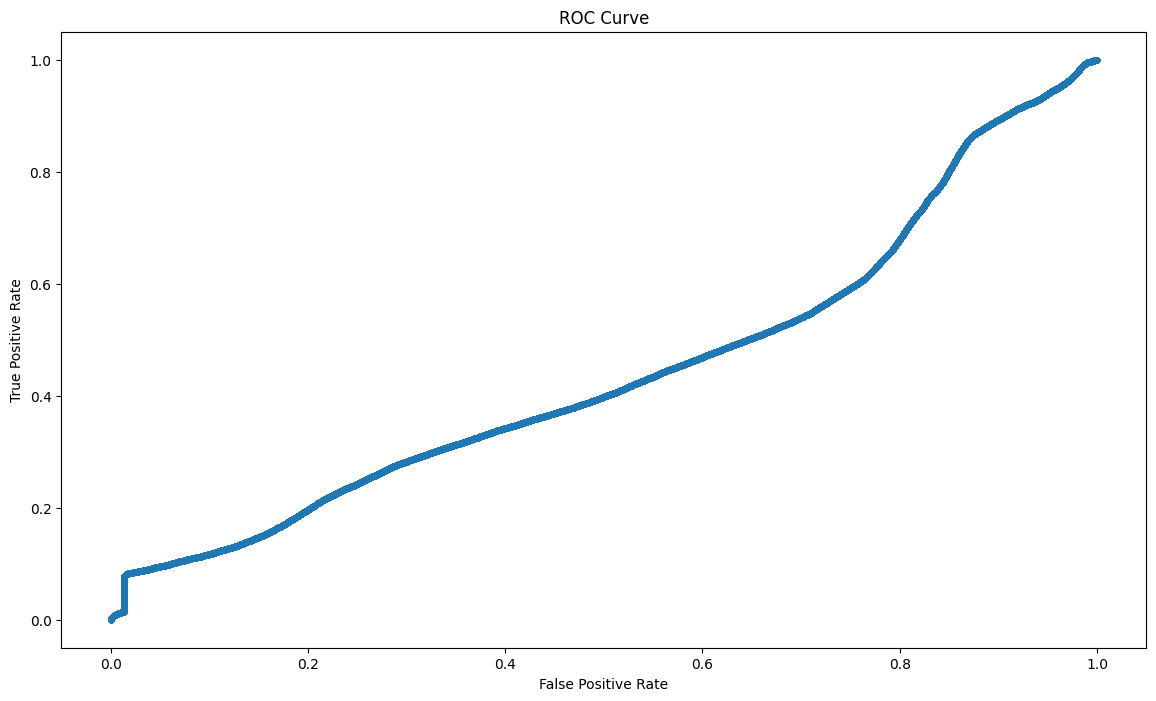

Auc for our sample data is 0.444


In [90]:
re = np.linalg.norm(np.asarray(testing.values).astype('float32') - predictions, axis = 1)

threshold = 5400000

result_list = [1 if value > threshold else 0 for value in re]


# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

conf_matrix = confusion_matrix(labels, result_list)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()


# Accuracy + Precision + Recall + F1
acc = np.round(metrics.accuracy_score(labels, result_list), 3)
prec = np.round(metrics.precision_score(labels, result_list), 3)
rec = (metrics.recall_score(labels, result_list), 3)
f1 = np.round(metrics.f1_score(labels, result_list), 3)

print("acc = " + str(acc) + " prec = "  + str(prec) + " recal = " +  str(rec) + " f1 = "  + str(f1))


# ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(labels, re)

plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AUC
from sklearn .metrics import roc_auc_score

auc = np.round(roc_auc_score(labels, re), 3)
print("Auc for our sample data is {}".format(auc))